1st step is to import all the libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
!pip install ibm_watson_machine_learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_11997958f54945e98d51207f798397ab = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_11997958f54945e98d51207f798397ab = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_11997958f54945e98d51207f798397ab = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oD8GUCdDOccoJSU5XdvW1EO_ibEDzVaFyy0-fXmB9JtL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_11997958f54945e98d51207f798397ab)

body = client_11997958f54945e98d51207f798397ab.get_object(Bucket='predictingandanalyzingurbanwaterq-donotdelete-pr-gkbb5bjqfplrur',Key='water_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
dataset.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,7.6,110,5.7,1.1,NAN,NAN,546,2003


In [5]:
dataset.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [7]:
dataset.shape

(1991, 12)

# Exploratory Data Anaysis

Handling Missing Values

In [8]:
dataset.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [9]:
dataset.isnull().sum() # sum of missing values

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

So there are no null values

In [10]:
dataset.dtypes # checking the datatypes of columns

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

Converting object datatypes to float for the calculation of water quality index

In [11]:
dataset['Temp']=pd.to_numeric(dataset['Temp'],errors='coerce')
dataset['D.O. (mg/l)']=pd.to_numeric(dataset['D.O. (mg/l)'],errors='coerce')
dataset['PH']=pd.to_numeric(dataset['PH'],errors='coerce')
dataset['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(dataset['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
dataset['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(dataset['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
dataset['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(dataset['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
dataset['B.O.D. (mg/l)']=pd.to_numeric(dataset['B.O.D. (mg/l)'],errors='coerce')
dataset.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [12]:
dataset.isnull().any() # After converting the objects to float, we have missing values

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [13]:
dataset.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

Since there are null values in the dataset now, we need to eliminate them now. we can do it by replacing them with mean or mode

In [14]:
dataset['Temp'].fillna(dataset['Temp'].mean(),inplace=True)
dataset['D.O. (mg/l)'].fillna(dataset['D.O. (mg/l)'].mean(),inplace=True)
dataset['PH'].fillna(dataset['PH'].mean(),inplace=True)
dataset['CONDUCTIVITY (µmhos/cm)'].fillna(dataset['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
dataset['B.O.D. (mg/l)'].fillna(dataset['B.O.D. (mg/l)'].mean(),inplace=True)
dataset['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(dataset['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
dataset['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(dataset['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [15]:
dataset.isnull().sum() # no null values now

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [16]:
dataset

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,562.0,2003


we can drop fecal coliform (MPN/100ml) because we alreay have one

In [17]:
dataset.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [18]:
dataset

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


Since the column names are too big and difficult to use again and again, lets replace them for simplification 

In [19]:
dataset=dataset.rename(columns={'D.O. (mg/l)':'do'})
dataset=dataset.rename(columns={'PH':'ph'})
dataset=dataset.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
dataset=dataset.rename(columns={'B.O.D. (mg/l)':'bod'})
dataset=dataset.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
dataset=dataset.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
dataset=dataset.rename(columns={'STATION CODE':'station'})
dataset=dataset.rename(columns={'LOCATIONS':'location'})
dataset=dataset.rename(columns={'STATE':'state'})
dataset=dataset.rename(columns={'Temp':'temp'})

In [20]:
dataset

,station,location,state,temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


Lets calculate the quality index for each column
we have to first calculate each column which we can do using looping with the help of if and else

In [21]:
#calulation of Ph
dataset['npH']=dataset.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [22]:
#calculation of dissolved oxygen
dataset['ndo']=dataset.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [23]:
#calculation of total coliform
dataset['nco']=dataset.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [24]:
#calc of B.D.O
dataset['nbdo']=dataset.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [25]:
#calculation of electrical conductivity
dataset['nec']=dataset.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [26]:
#Calulation of NITRATENAN N+ NITRITENANN
dataset['nna']=dataset.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [27]:
dataset

,station,location,state,temp,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,100,100,80,60,60,100
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,100,80,40,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,0,100,60,100,100,100
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,0,100,60,100,100,100
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,0,100,40,100,100,100
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,0,100,40,100,100,100


Now we have to Calculate the water quality index WQI for each of the values we calculated above

In [28]:
dataset['wph']=dataset.npH * 0.165
dataset['wdo']=dataset.ndo * 0.281
dataset['wbdo']=dataset.nbdo * 0.234
dataset['wec']=dataset.nec* 0.009
dataset['wna']=dataset.nna * 0.028
dataset['wco']=dataset.nco * 0.281
dataset['wqi']=dataset.wph+dataset.wdo+dataset.wbdo+dataset.wec+dataset.wna+dataset.wco 
dataset

,station,location,state,temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


calculating the overall wqi for each year

In [29]:
average=dataset.groupby('year')['wqi'].mean()
average

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
2008    73.506289
2009    74.456685
2010    75.454787
2011    76.666580
2012    79.496712
2013    76.494789
2014    77.839592
Name: wqi, dtype: float64

In [30]:
wqi=average.reset_index(level=0,inplace=False)
wqi

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


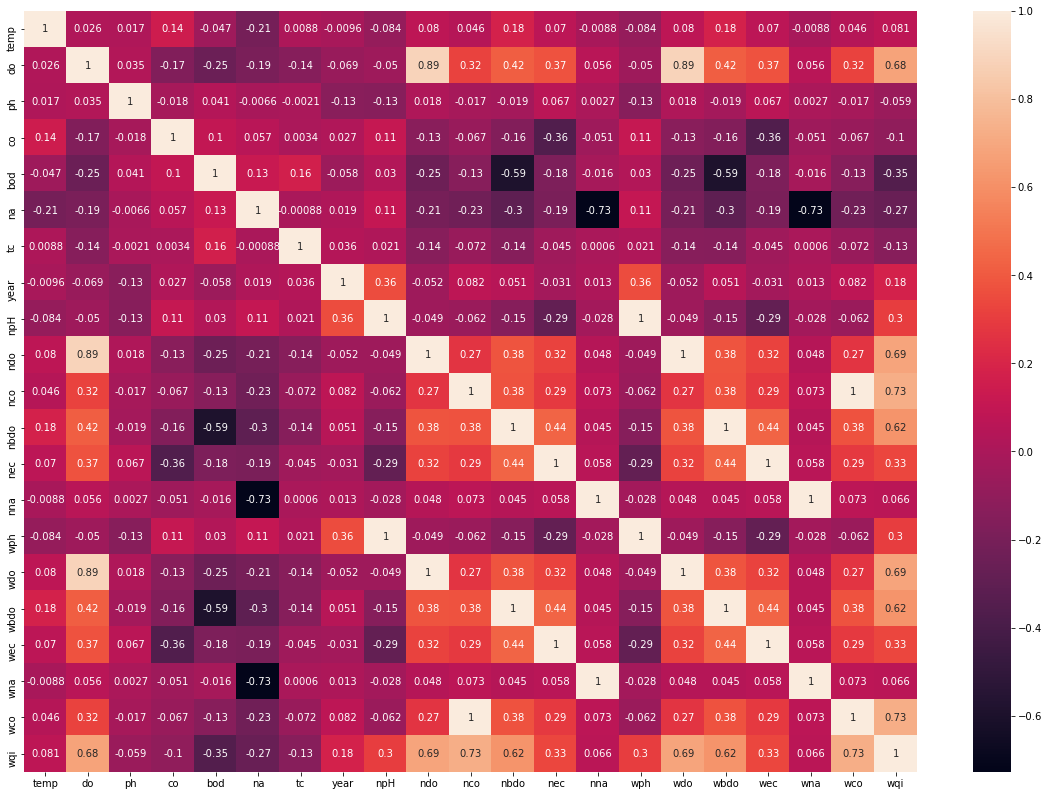

In [31]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

# Data Visualisation

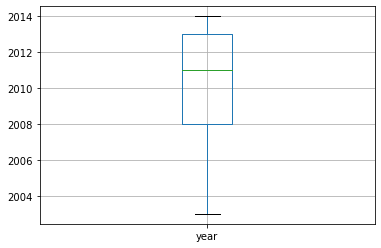

In [32]:
dataset.boxplot(column='year')

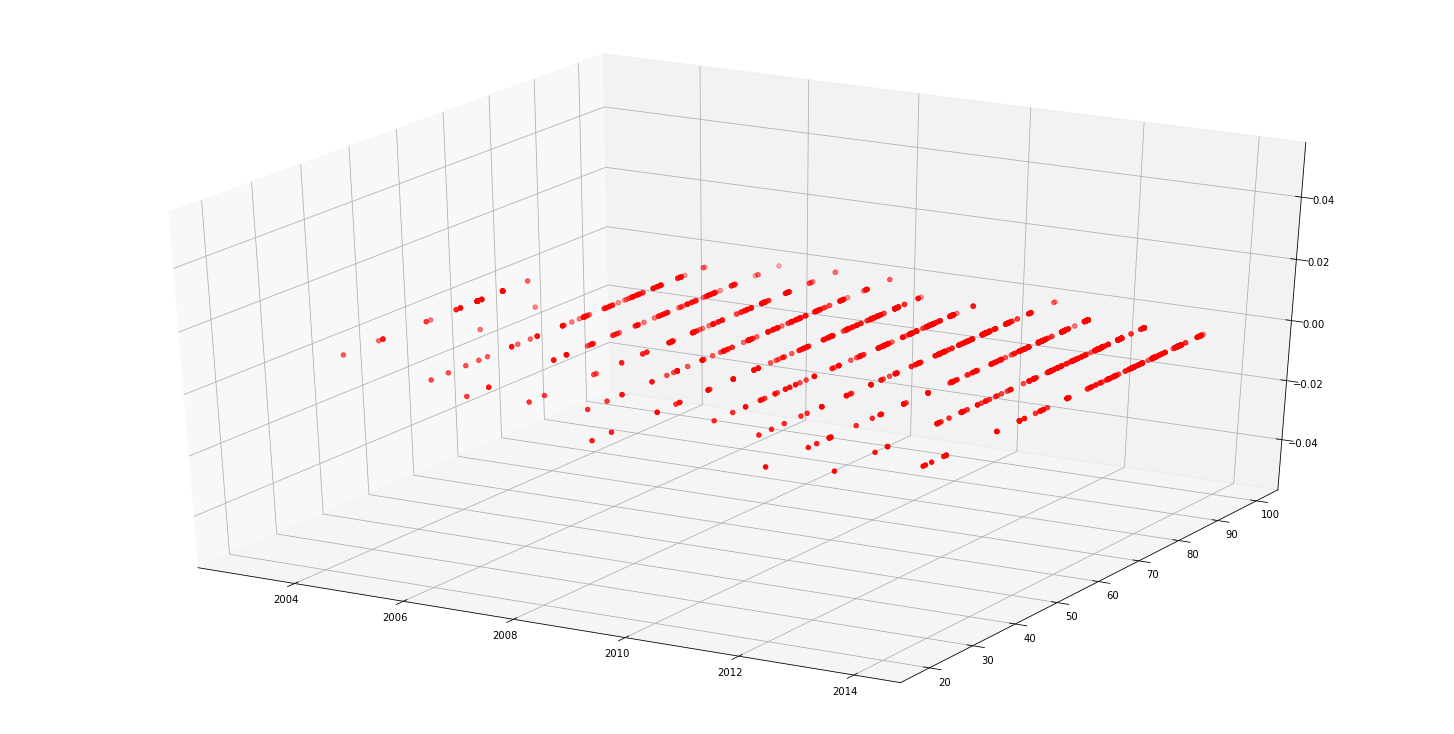

,station,location,state,temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [33]:
#visualizing the filttered data

year=dataset['year'].values
AQI=dataset['wqi'].values
dataset['wqi']=pd.to_numeric(dataset['wqi'])
dataset['year']=pd.to_numeric(dataset['year'])

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
dataset

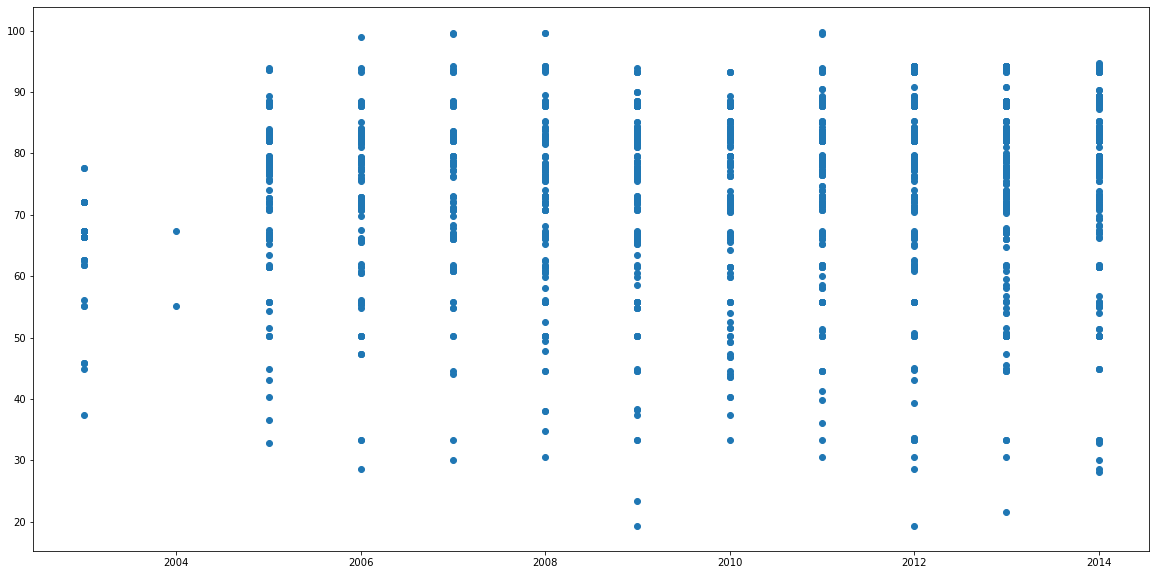

In [34]:
#scatter plot of data points
cols =['year']
y = dataset['wqi']
x=dataset[cols]
plt.scatter(x,y)
plt.show()



In [35]:
dataset

,station,location,state,temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [36]:
dataset

,station,location,state,temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


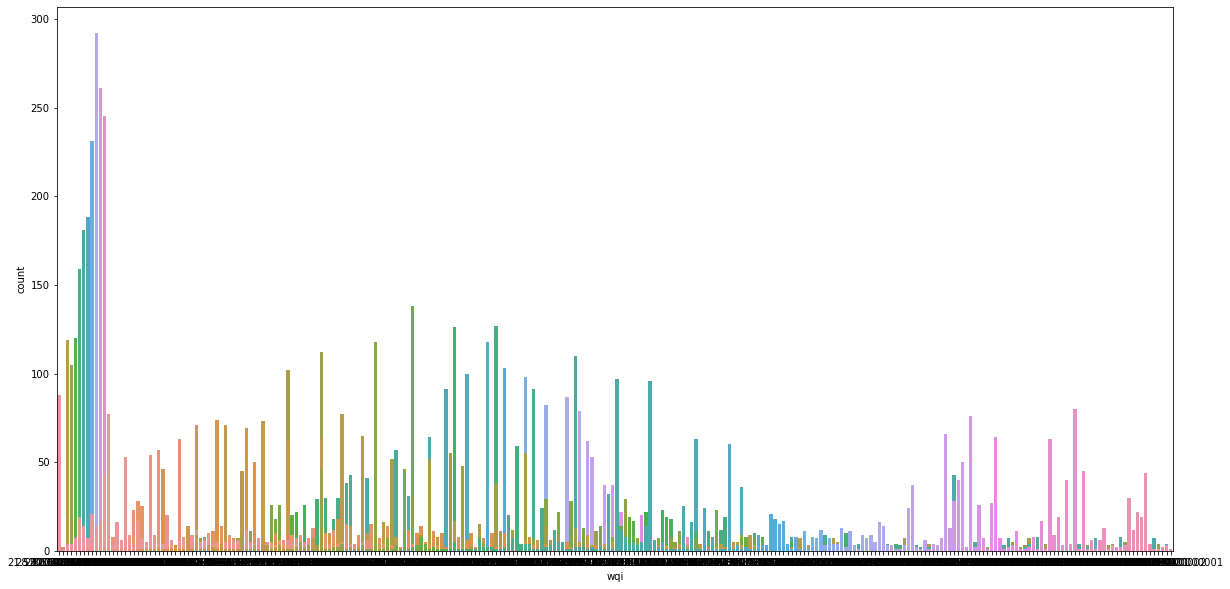

In [37]:
import seaborn as sns
sns.countplot(dataset['year']) 
sns.countplot(dataset['do'])
sns.countplot(dataset['ph'])
sns.countplot(dataset['co'])
sns.countplot(dataset['bod'])
sns.countplot(dataset['na'])
sns.countplot(dataset['tc'])
sns.countplot(dataset['wqi'])

In [45]:
#Removing un necessary columns location state and the columnn created to calculate Water Quality Index
dataset.drop(['temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)

In [46]:
dataset

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,76.96
2,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,69.34
4,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,77.14
...,...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,72.06
1987,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,72.06
1988,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,66.44
1989,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,66.44


# Fitting model using random forest

We need to Split the dataset into train and test set in order to predict w.r.t X_test
Predict w.r.t x_test
In regression check RSME Score
Plot graph

Splitting the data into dependent and independent variables


In [47]:
x = dataset.iloc[:,0:7].values
y = dataset.iloc[:,7:].values

In [48]:
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 2.70000000e+01, 2.01400000e+03],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 8.39100000e+03, 2.01400000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 5.33000000e+03, 2.01400000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 5.70000000e+02, 2.00300000e+03],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 5.62000000e+02, 2.00300000e+03],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 5.46000000e+02, 2.00300000e+03]])

In [49]:
x.shape

(1991, 7)

In [50]:
y.shape

(1991, 1)

# Feature Scaling

whenever there is huge disparity between the x values, we need to do feauture scaling which is basically normalising 
range of independent variable of data

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.32466585e-01, -5.57912384e-02, -2.87072862e-01, ...,
        -3.95467938e-01, -3.88098511e-02,  1.29617001e+00],
       [-5.23858621e-01, -5.59512658e-02, -2.89610977e-01, ...,
        -3.69502901e-01, -3.82015883e-02,  1.29617001e+00],
       [-7.00634974e-02, -5.61112931e-02, -2.91423917e-01, ...,
        -3.95467938e-01, -3.84241962e-02,  1.29617001e+00],
       ...,
       [ 9.13159270e-01, -7.51631224e-03, -3.22751510e-01, ...,
         0.00000000e+00, -3.87703620e-02, -2.30264077e+00],
       [ 9.88791790e-01, -1.12502844e-02, -3.22697122e-01, ...,
         0.00000000e+00, -3.87709438e-02, -2.30264077e+00],
       [ 9.13159270e-01, -1.11521706e-03, -3.22842157e-01, ...,
         0.00000000e+00, -3.87721073e-02, -2.30264077e+00]])

# Splitting the data into train and test

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [53]:
x_train.shape

(1592, 7)

In [54]:
x_test.shape

(399, 7)

In [55]:
y_train.shape

(1592, 1)

In [56]:
y_test.shape

(399, 1)

# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 10 ,random_state = 0)
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [58]:
y_pred

array([30.124, 75.02 , 93.82 , 88.2  , 66.818, 93.82 , 72.014, 82.742,
       30.064, 88.02 , 88.2  , 82.94 , 71.88 , 79.64 , 82.94 , 82.242,
       31.194, 69.362, 70.8  , 73.764, 78.098, 61.542, 82.04 , 82.58 ,
       85.242, 33.06 , 83.664, 61.11 , 72.464, 88.2  , 66.12 , 75.396,
       88.38 , 51.324, 85.242, 72.06 , 87.66 , 87.66 , 72.86 , 83.87 ,
       82.04 , 80.826, 72.06 , 45.676, 88.56 , 71.376, 67.942, 91.068,
       66.44 , 37.556, 67.06 , 89.85 , 55.82 , 82.94 , 76.42 , 86.234,
       82.04 , 71.332, 78.66 , 70.8  , 83.52 , 60.82 , 88.56 , 43.708,
       55.82 , 87.66 , 79.64 , 70.628, 66.44 , 82.98 , 92.884, 93.64 ,
       83.52 , 87.66 , 72.86 , 88.506, 82.94 , 87.79 , 82.58 , 82.76 ,
       83.7  , 76.238, 77.958, 84.432, 88.47 , 67.122, 61.238, 83.7  ,
       94.18 , 70.394, 76.214, 78.664, 66.44 , 86.072, 55.82 , 43.176,
       82.76 , 43.176, 79.46 , 82.98 , 84.684, 77.14 , 66.44 , 73.04 ,
       82.94 , 43.6  , 82.04 , 61.44 , 87.66 , 79.64 , 94.18 , 82.94 ,
      

In [59]:
reg_rf.score(x_train, y_train)

0.9948128963672512

In [60]:
reg_rf.score(x_test, y_test)

0.9671235883402002

In [61]:
y_test[10:15]

array([[88.2 ],
       [82.94],
       [71.88],
       [79.64],
       [82.94]])

In [62]:
y_pred[10:15]

array([88.2 , 82.94, 71.88, 79.64, 82.94])

# Model Analysis

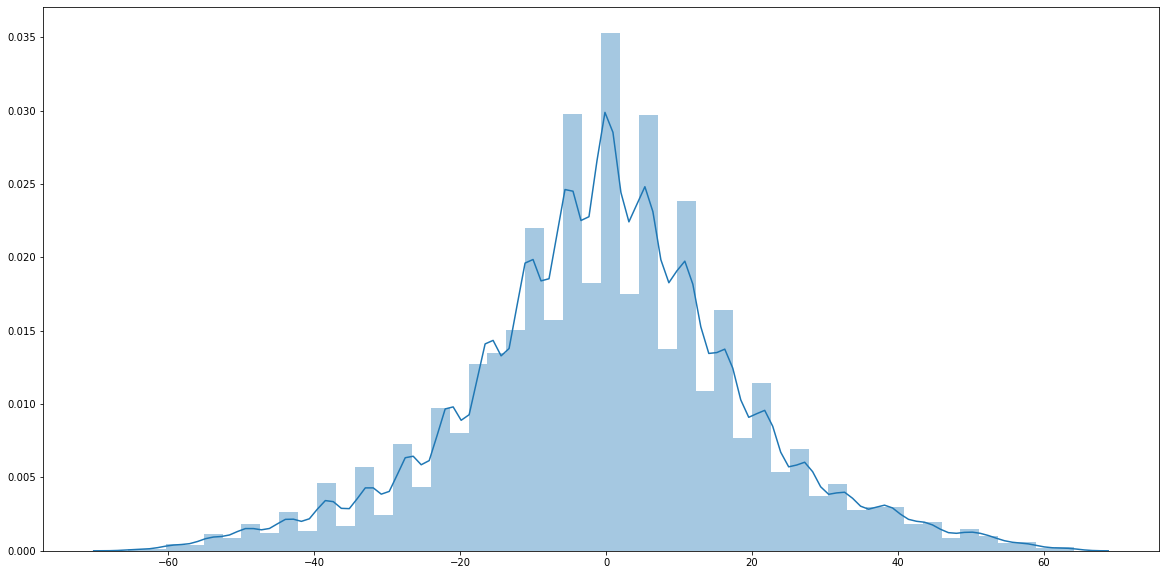

In [63]:
sns.distplot(y_test-y_pred)
plt.show()

# Model Evaluation

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9871127819548938
MSE: 6.0312642305764435
RMSE: 2.4558632353159333


In [65]:
metrics.r2_score(y_test, y_pred)

0.9671235883402002

Save the model 

In [68]:
import pickle
pickle.dump(reg_rf,open('wqi.pkl','wb'))
model = pickle.load(open('wqi.pkl','rb'))

In [69]:
pickle.dump(sc,open('sc.pkl','wb'))
model = pickle.load(open('sc.pkl','rb'))

In [70]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ZsuEbxcoweft0iyhr9bxPFEeRa18adey5xsu9XNShUTj"
}
client=APIClient(wml_credentials)

In [71]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [72]:
space_uid=guid_from_space_name(client,'Water Quality Model Deployment')
print("Space UID = " + space_uid)

Space UID = ce734534-3fea-4ba5-84d4-17fddcc2b2d9


In [73]:
client.set.default_space(space_uid)

'SUCCESS'

In [74]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [75]:
software_spec_uid=client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [76]:
model_details=client.repository.store_model(model=reg_rf,meta_props={
    client.repository.ModelMetaNames.NAME:"urban water quality model",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                           )
model_id=client.repository.get_model_uid(model_details)

In [77]:
model_id

'2f62c62e-04d2-42e6-9cc0-2b7cba070eee'

In [78]:
x_train[0]

array([-0.67512366, -0.05584458, -0.20875388,  0.06397444,  0.89759086,
       -0.03841183,  0.64184078])

In [80]:
reg_rf.predict([[-0.67512366, -0.05584458, -0.20875388,  0.06397444,  0.89759086,
       -0.03841183,  0.64184078]])

array([67.06])